# Melody Reconstruction Pipeline
## Complete Audio Processing Workflow

This notebook demonstrates the complete pipeline for:
1. **Splitting** long audio files into individual notes with timestamps
2. **Predicting** each note using Conv2D or RandomForest models
3. **Reconstructing** the melody with timing information

The pipeline is designed for **learning and transparency** - each step is clearly logged and explained.

## 1. Import Required Libraries

Import all necessary modules for audio processing, ML models, and data visualization.

In [1]:
import sys
import os
from pathlib import Path

# Add parent directory to path for custom imports
repo_root = Path.cwd().parent.parent
sys.path.insert(0, str(repo_root))

# Data processing
import numpy as np
import pandas as pd
import librosa
import librosa.display

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Custom modules
from databass.pipeline import MelodyReconstructor

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')

print("✓ All imports successful!")
print(f"Repository root: {repo_root}")

/home/edgar/.pyenv/versions/DataBass/lib/python3.12/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
2025-12-11 11:32:00.857858: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-11 11:32:00.966481: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-11 11:32:03.515788: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


✓ All imports successful!
Repository root: /home/edgar/code/Arkyed/08-Project/databass-code/DataBass


## 2. Configuration and Setup

Define the audio file to process and choose your model type.

In [2]:
# ========== CONFIGURATION ==========
# Path to your long audio file
# Update this with your actual audio file path
AUDIO_FILE = "HappyBDay.wav"  # Change to your audio file

# Choose model: 'conv2d' or 'randforest'
MODEL_TYPE = 'randforest'  # Change to 'randforest' to use RandomForest

# Output folder for split notes
NOTES_FOLDER = "pipeline_notes"

# Output CSV file
OUTPUT_CSV = "melody_reconstruction.csv"

print("=" * 70)
print("PIPELINE CONFIGURATION")
print("=" * 70)
print(f"📁 Audio file:     {AUDIO_FILE}")
print(f"🤖 Model type:     {MODEL_TYPE.upper()}")
print(f"📂 Notes folder:   {NOTES_FOLDER}")
print(f"📊 Output CSV:     {OUTPUT_CSV}")
print("=" * 70)

PIPELINE CONFIGURATION
📁 Audio file:     HappyBDay.wav
🤖 Model type:     RANDFOREST
📂 Notes folder:   pipeline_notes
📊 Output CSV:     melody_reconstruction.csv


## 3. Initialize the Pipeline

Create the MelodyReconstructor instance with your chosen model.

In [3]:
print("\n🔧 Initializing MelodyReconstructor...\n")

# Create the reconstructor with your chosen model
reconstructor = MelodyReconstructor(model_type=MODEL_TYPE)

print("✓ Reconstructor initialized successfully!")


🔧 Initializing MelodyReconstructor...

🔧 Initializing MelodyReconstructor with RANDFOREST model...
Repository root: /home/edgar/code/Arkyed/08-Project/databass-code/DataBass
Model path: /home/edgar/code/Arkyed/08-Project/databass-code/DataBass/data/models/RandForClassifier.pkl
✓ RandomForest model loaded successfully
✓ Reconstructor initialized successfully!


## 4. Step 1: Split Audio into Notes

This step uses onset detection to find where each note starts and calculates the duration of each note.

**What happens here:**
- Load the audio file with librosa
- Detect onsets (note boundaries) using librosa's onset detection algorithm
- Estimate the tempo (BPM) of the audio
- Split the audio into individual WAV files
- Calculate timing information (onset time and duration for each note)

In [4]:
# Execute Step 1: Audio Splitting
success = reconstructor.split_audio(
    audio_file=AUDIO_FILE,
    notes_folder=NOTES_FOLDER,
    confirm_clear=False  # Don't ask for confirmation
)

if not success:
    print("\n❌ Audio splitting failed! Check the error messages above.")
else:
    # Extract and display split results
    split_info = reconstructor.results['split']

    print("\n" + "=" * 70)
    print("AUDIO SPLIT RESULTS")
    print("=" * 70)

    # Create a summary DataFrame
    summary_data = {
        'Metric': [
            'Total Notes Detected',
            'Files Created',
            'Total Duration (s)',
            'Estimated Tempo (BPM)',
            'Output Folder'
        ],
        'Value': [
            split_info['num_notes_detected'],
            split_info['num_files_created'],
            f"{sum(split_info['note_lengths']):.2f}",
            f"{float(split_info['tempo']):.1f}" if split_info.get('tempo') else "N/A",
            split_info['output_folder']
        ]
    }

    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))

    # Show details of each note
    print("\n" + "-" * 70)
    print("DETAILED NOTE INFORMATION")
    print("-" * 70)

    notes_detail = pd.DataFrame({
        'Note #': range(1, split_info['num_notes_detected'] + 1),
        'Onset Time (s)': split_info['onset_times'],
        'Duration (s)': split_info['note_lengths'],
        'End Time (s)': [t + d for t, d in zip(split_info['onset_times'], split_info['note_lengths'])],
        'File': [f"note_{i:03d}.wav" for i in range(1, split_info['num_notes_detected'] + 1)]
    })

    print(notes_detail.to_string(index=False))
    print()


ÉTAPE 1: DÉCOUPAGE AUDIO
📁 Audio file: HappyBDay.wav
📂 Output folder: pipeline_notes
HappyBDay.wav
True
✓ Loading audio file: HappyBDay.wav (3.06 MB)
✓ Audio loaded successfully - Duration: 18.17s, Sample rate: 44100 Hz
✓ Estimated tempo: 103.36 BPM
✓ Detected 25 note(s) stored in onset_times
✓ Detected note lengths for 25 note(s)
✓ number of note lengths correspond to number of detected onsets
Folder 'pipeline_notes' successfully emptied.
✓ Output folder created/verified: 'pipeline_notes'
  ✓ Note 001 saved: pipeline_notes/note_001.wav (313ms)
  ✓ Note 002 saved: pipeline_notes/note_002.wav (290ms)
  ✓ Note 003 saved: pipeline_notes/note_003.wav (616ms)
  ✓ Note 004 saved: pipeline_notes/note_004.wav (580ms)
  ✓ Note 005 saved: pipeline_notes/note_005.wav (604ms)
  ✓ Note 006 saved: pipeline_notes/note_006.wav (1207ms)
  ✓ Note 007 saved: pipeline_notes/note_007.wav (302ms)
  ✓ Note 008 saved: pipeline_notes/note_008.wav (290ms)
  ✓ Note 009 saved: pipeline_notes/note_009.wav (604ms)

## 5. Step 2: Predict Each Note Using the Model

Now each individual note file is processed by the ML model to predict which musical note it is.

**What happens here:**
- Load each note_XXX.wav file
- Preprocess it according to the model requirements:
  - **Conv2D**: Generate mel-spectrogram and normalize
  - **RandomForest**: Extract waveform and normalize
- Feed preprocessed data to the model
- Get prediction (e.g., "E1", "C2", "G#3", etc.)

In [5]:
# Execute Step 2: Predict Notes
print(f"\n🤖 Using {MODEL_TYPE.upper()} model for predictions...\n")

success = reconstructor.predict_notes()

if not success:
    print("\n❌ Note prediction failed!")
else:
    print("\n✓ All predictions completed successfully!")


🤖 Using RANDFOREST model for predictions...


ÉTAPE 2: PRÉDICTION DES NOTES
🎵 Model type: RANDFOREST
🔮 Predicting 25 note(s)...

  [  1/25] 🎵    C2 | Time:   0.01s | Duration:  0.313s | File: note_001.wav
  [  2/25] 🎵    G2 | Time:   0.01s | Duration:  0.290s | File: note_002.wav
  [  3/25] 🎵    A1 | Time:   0.02s | Duration:  0.615s | File: note_003.wav
  [  4/25] 🎵    A2 | Time:   0.02s | Duration:  0.580s | File: note_004.wav
  [  5/25] 🎵    C2 | Time:   0.03s | Duration:  0.604s | File: note_005.wav
  [  6/25] 🎵    B1 | Time:   0.04s | Duration:  1.207s | File: note_006.wav
  [  7/25] 🎵    G2 | Time:   0.05s | Duration:  0.302s | File: note_007.wav
  [  8/25] 🎵    G2 | Time:   0.05s | Duration:  0.290s | File: note_008.wav
  [  9/25] 🎵    A1 | Time:   0.06s | Duration:  0.604s | File: note_009.wav
  [ 10/25] 🎵    F3 | Time:   0.06s | Duration:  0.604s | File: note_010.wav
  [ 11/25] 🎵    D2 | Time:   0.07s | Duration:  0.592s | File: note_011.wav
  [ 12/25] 🎵    B1 | Time:   0.08s

## 6. Step 3: Reconstruct Melody with Timing

Combine all predictions with the timing information to create the final melody sequence.

**What happens here:**
- Assemble predictions with their corresponding onset times and durations
- Create a complete melody sequence from start to finish
- Validate that all notes are accounted for

In [6]:
# Execute Step 3: Reconstruct Melody
reconstruction = reconstructor.reconstruct_melody()

# Display the melody sequence in a readable table
if reconstruction.get('success'):
    melody_df = pd.DataFrame(reconstruction['melody_sequence'])

    print("\n" + "=" * 100)
    print("RECONSTRUCTED MELODY")
    print("=" * 100)
    print(f"Total notes: {reconstruction['num_notes']}")
    print(f"Total duration: {reconstruction['total_duration']:.2f} seconds\n")

    # Display table
    display_df = melody_df[[
        'index', 'note', 'start_time', 'duration', 'end_time', 'source_file'
    ]].copy()
    display_df.columns = ['#', 'Note', 'Start (s)', 'Duration (s)', 'End (s)', 'Source File']

    # Format numeric columns
    display_df['Start (s)'] = display_df['Start (s)'].apply(lambda x: f"{x:.3f}")
    display_df['Duration (s)'] = display_df['Duration (s)'].apply(lambda x: f"{x:.3f}")
    display_df['End (s)'] = display_df['End (s)'].apply(lambda x: f"{x:.3f}")

    print(display_df.to_string(index=False))

    # Display melody sequence as text
    print("\n" + "-" * 100)
    print("MELODY SEQUENCE:")
    melody_notes = ' → '.join(reconstruction['notes_list'])
    print(f"{melody_notes}")
    print("-" * 100)
else:
    print("\n❌ Melody reconstruction failed!")


ÉTAPE 3: RECONSTRUCTION DE LA MÉLODIE
📝 Assembling 25 notes into sequence...

  [  1]    C2 |   0.01s →   0.32s ( 0.313s)
  [  2]    G2 |   0.01s →   0.30s ( 0.290s)
  [  3]    A1 |   0.02s →   0.63s ( 0.615s)
  [  4]    A2 |   0.02s →   0.60s ( 0.580s)
  [  5]    C2 |   0.03s →   0.63s ( 0.604s)
  [  6]    B1 |   0.04s →   1.24s ( 1.207s)
  [  7]    G2 |   0.05s →   0.35s ( 0.302s)
  [  8]    G2 |   0.05s →   0.34s ( 0.290s)
  [  9]    A1 |   0.06s →   0.66s ( 0.604s)
  [ 10]    F3 |   0.06s →   0.67s ( 0.604s)
  [ 11]    D2 |   0.07s →   0.66s ( 0.592s)
  [ 12]    B1 |   0.08s →   1.29s ( 1.207s)
  [ 13]    G2 |   0.09s →   0.41s ( 0.313s)
  [ 14]   G#2 |   0.10s →   0.37s ( 0.279s)
  [ 15]    A1 |   0.10s →   0.70s ( 0.604s)
  [ 16]    E2 |   0.11s →   0.70s ( 0.592s)
  [ 17]    C2 |   0.11s →   0.72s ( 0.604s)
  [ 18]    B1 |   0.12s →   0.72s ( 0.604s)
  [ 19]    A1 |   0.13s →   1.62s ( 1.498s)
  [ 20]    F2 |   0.14s →   0.53s ( 0.383s)
  [ 21]    F2 |   0.15s →   0.52s ( 0.372

## 7. Save Results to CSV

Save the reconstructed melody and timing information to a CSV file for future reference.

In [7]:
reconstructor.save_results_to_csv(output_csv=OUTPUT_CSV)

# Load and display the saved CSV
print(f"\n📄 Loading saved results from {OUTPUT_CSV}...\n")
csv_df = pd.read_csv(OUTPUT_CSV)
print(csv_df.to_string(index=False))
print(f"\n✓ CSV file saved: {OUTPUT_CSV}")


SAUVEGARDE DES RÉSULTATS
✓ Results saved to: melody_reconstruction.csv

📄 Loading saved results from melody_reconstruction.csv...

 note_index note  start_time_s  duration_s  end_time_s  source_file
          1   C2         0.009       0.313       0.322 note_001.wav
          2   G2         0.012       0.290       0.302 note_002.wav
          3   A1         0.016       0.615       0.631 note_003.wav
          4   A2         0.023       0.580       0.603 note_004.wav
          5   C2         0.030       0.604       0.633 note_005.wav
          6   B1         0.037       1.207       1.244 note_006.wav
          7   G2         0.051       0.302       0.352 note_007.wav
          8   G2         0.054       0.290       0.344 note_008.wav
          9   A1         0.057       0.604       0.661 note_009.wav
         10   F3         0.064       0.604       0.668 note_010.wav
         11   D2         0.071       0.592       0.664 note_011.wav
         12   B1         0.078       1.207       1.2

## 8. Visualize Results

Create a timeline visualization showing the audio waveform with detected onsets and predicted notes.

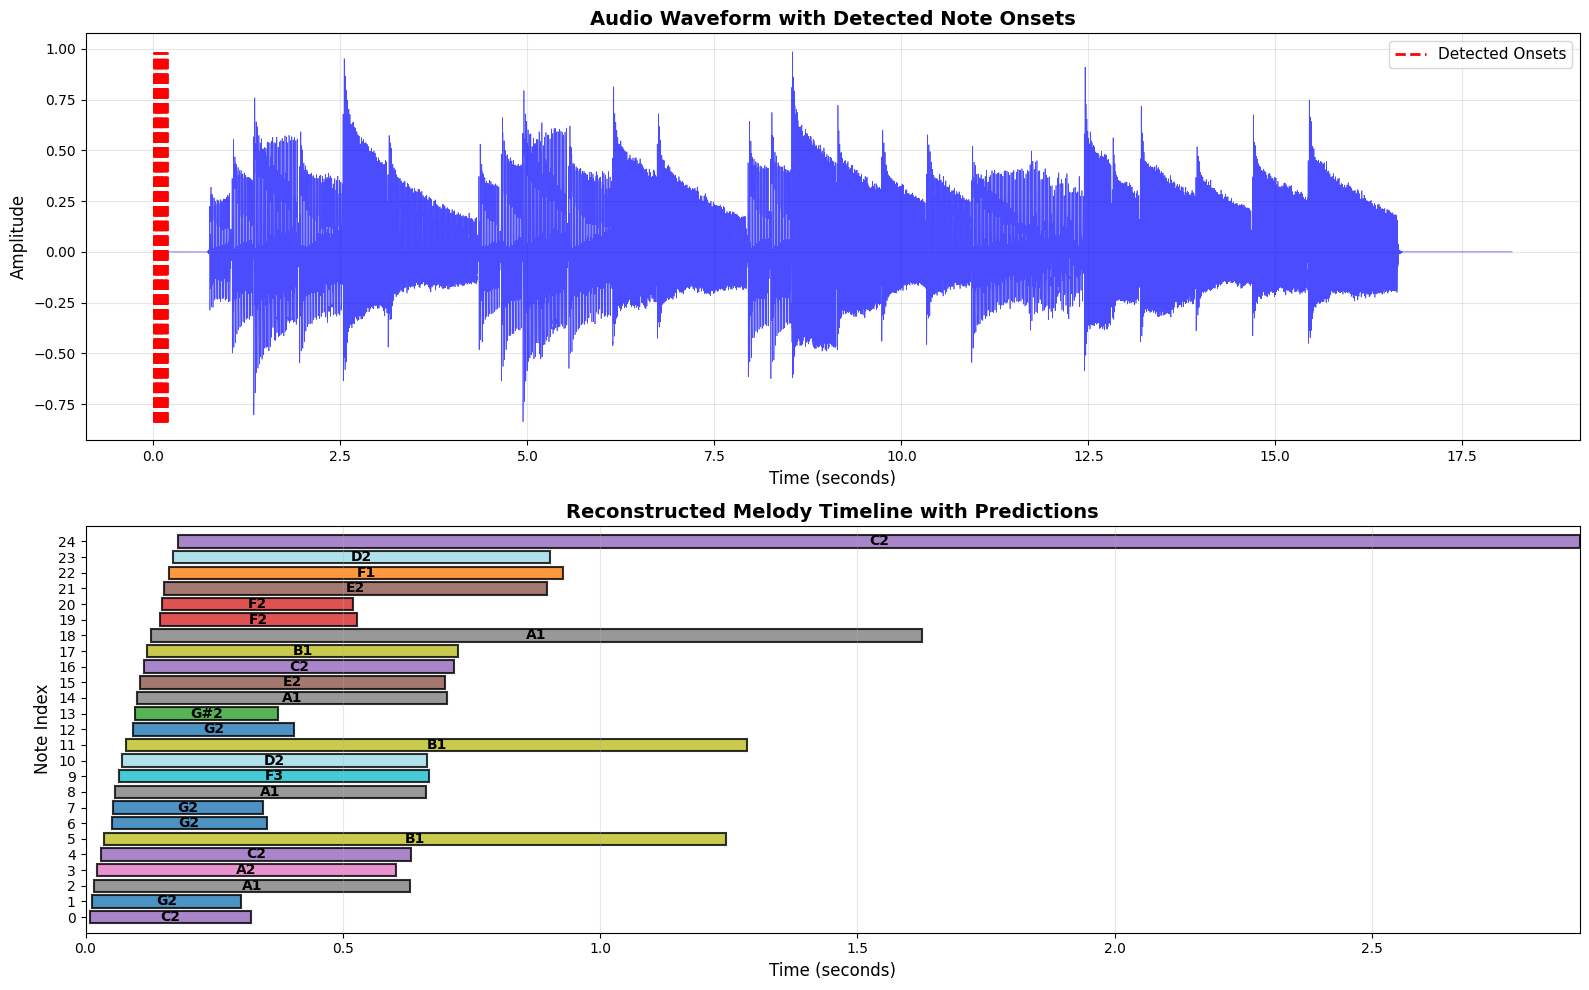


✓ Visualization saved as 'melody_reconstruction_timeline.png'


In [8]:
if reconstruction.get('success'):
    # Load the original audio for visualization
    y, sr = librosa.load(AUDIO_FILE, sr=None)

    # Create figure with two subplots
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))

    # Plot 1: Waveform with onsets
    time = np.arange(len(y)) / sr
    axes[0].plot(time, y, linewidth=0.5, alpha=0.7, color='blue')

    onset_times = reconstructor.results['split']['onset_times']
    axes[0].vlines(onset_times, ymin=y.min(), ymax=y.max(),
                    colors='red', linestyles='--', linewidth=2, label='Detected Onsets')

    axes[0].set_xlabel('Time (seconds)', fontsize=12)
    axes[0].set_ylabel('Amplitude', fontsize=12)
    axes[0].set_title('Audio Waveform with Detected Note Onsets', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)

    # Plot 2: Timeline with predicted notes
    melody_seq = reconstruction['melody_sequence']

    colors = plt.cm.tab20(np.linspace(0, 1, len(set([n['note'] for n in melody_seq]))))
    note_to_color = {note: colors[i] for i, note in enumerate(set([n['note'] for n in melody_seq]))}

    for i, note_info in enumerate(melody_seq):
        start = note_info['start_time']
        duration = note_info['duration']
        note_name = note_info['note']

        rect = mpatches.Rectangle(
            (start, i - 0.4), duration, 0.8,
            facecolor=note_to_color[note_name],
            edgecolor='black',
            linewidth=1.5,
            alpha=0.8
        )
        axes[1].add_patch(rect)

        # Add note name text
        axes[1].text(start + duration/2, i, note_name,
                    ha='center', va='center', fontsize=10, fontweight='bold')

    axes[1].set_xlim(0, max([n['end_time'] for n in melody_seq]))
    axes[1].set_ylim(-1, len(melody_seq))
    axes[1].set_xlabel('Time (seconds)', fontsize=12)
    axes[1].set_ylabel('Note Index', fontsize=12)
    axes[1].set_title('Reconstructed Melody Timeline with Predictions', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='x')
    axes[1].set_yticks(range(len(melody_seq)))

    plt.tight_layout()
    plt.savefig('melody_reconstruction_timeline.png', dpi=150, bbox_inches='tight')
    plt.show()

    print("\n✓ Visualization saved as 'melody_reconstruction_timeline.png'")

## 9. Pipeline Summary and Statistics

Generate a comprehensive summary of the entire pipeline execution.

In [9]:
# Get full report
report = reconstructor.get_full_report()

print("\n" + "=" * 100)
print("COMPLETE PIPELINE EXECUTION REPORT")
print("=" * 100)

print(f"\n📋 CONFIGURATION:")
print(f"   Model Type: {report['model_type'].upper()}")
print(f"   Audio File: {report['audio_file']}")
print(f"   Notes Folder: {report['notes_folder']}")

print(f"\n📊 STATISTICS:")
split_info = report['split_info']
recon_info = report['reconstruction']

print(f"   Total audio duration: {sum(split_info['note_lengths']):.2f} seconds")
print(f"   Estimated tempo: {float(split_info['tempo']):.1f} BPM" if split_info.get('tempo') else "   Tempo: N/A")
print(f"   Notes detected: {split_info['num_notes_detected']}")
print(f"   Files created: {split_info['num_files_created']}")
print(f"   Successful predictions: {recon_info['num_notes']}")

# Calculate accuracy
if split_info['num_notes_detected'] > 0:
    accuracy = (recon_info['num_notes'] / split_info['num_notes_detected']) * 100
    print(f"   Prediction success rate: {accuracy:.1f}%")

print(f"\n📝 OUTPUT FILES:")
print(f"   Melody CSV: {OUTPUT_CSV}")
print(f"   Notes folder: {NOTES_FOLDER}/")
print(f"   Timeline visualization: melody_reconstruction_timeline.png")

print("\n" + "=" * 100)
print("✓ PIPELINE EXECUTION COMPLETE!")
print("=" * 100)


COMPLETE PIPELINE EXECUTION REPORT

📋 CONFIGURATION:
   Model Type: RANDFOREST
   Audio File: HappyBDay.wav
   Notes Folder: pipeline_notes

📊 STATISTICS:
   Total audio duration: 17.42 seconds
   Estimated tempo: 103.4 BPM
   Notes detected: 25
   Files created: 25
   Successful predictions: 25
   Prediction success rate: 100.0%

📝 OUTPUT FILES:
   Melody CSV: melody_reconstruction.csv
   Notes folder: pipeline_notes/
   Timeline visualization: melody_reconstruction_timeline.png

✓ PIPELINE EXECUTION COMPLETE!


In [11]:
predictions = {"melody_sequence_Conv2D": [
    "C2",
    "C2",
    "B1",
    "C2",
    "D2",
    "A#1",
    "C2",
    "C2",
    "B1",
    "C2",
    "D2",
    "D2",
    "C2",
    "A1",
    "G2",
    "E2",
    "D2",
    "A#2",
    "C#2",
    "F2",
    "F2",
    "E2",
    "D2",
    "D2",
    "F1"
  ],
 "melody_sequence_randforest": [
    "A2",
    "C2",
    "C#2",
    "G#2",
    "F3",
    "B1",
    "B1",
    "D2",
    "C#2",
    "G1",
    "D#3",
    "C2",
    "B1",
    "B1",
    "G1",
    "C#2",
    "G#2",
    "B1",
    "F2",
    "F1",
    "E1",
    "C#2",
    "A2",
    "D#3",
    "G#2"
  ],
}

In [12]:
comparaisons = pd.DataFrame(predictions)
comparaisons['same'] = comparaisons['melody_sequence_Conv2D'] == comparaisons['melody_sequence_randforest']
comparaisons

,melody_sequence_Conv2D,melody_sequence_randforest,same
0,C2,A2,False
1,C2,C2,True
2,B1,C#2,False
3,C2,G#2,False
4,D2,F3,False
5,A#1,B1,False
6,C2,B1,False
7,C2,D2,False
8,B1,C#2,False
9,C2,G1,False
